In [3]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# Open the netCDF file using xarray
ds = xr.open_dataset('temporal_input/ocean-3d-u-1-daily-mean-ym_1999_01.nc?xu_ocean[0:1:3599],yu_ocean[0:1:2699],time[0:1:30],u[0:1:0][0:1:0][0:1:0][0:1:0]')
# Extract the latitude and longitude arrays using numpy
lat = np.array(ds['yu_ocean'])
lon = np.array(ds['xu_ocean'])
# get the minimum value for longitude
# Extract one time step and one depth of the u array using isel
u = ds['u'].isel(time=0, st_ocean=0)
print(ds['u'])


<xarray.DataArray 'u' (time: 31, st_ocean: 75, yu_ocean: 2700, xu_ocean: 3600)>
[22599000000 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1999-01-01T12:00:00 ... 1999-01-31T12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  sea_water_x_velocity


# Print the model domain

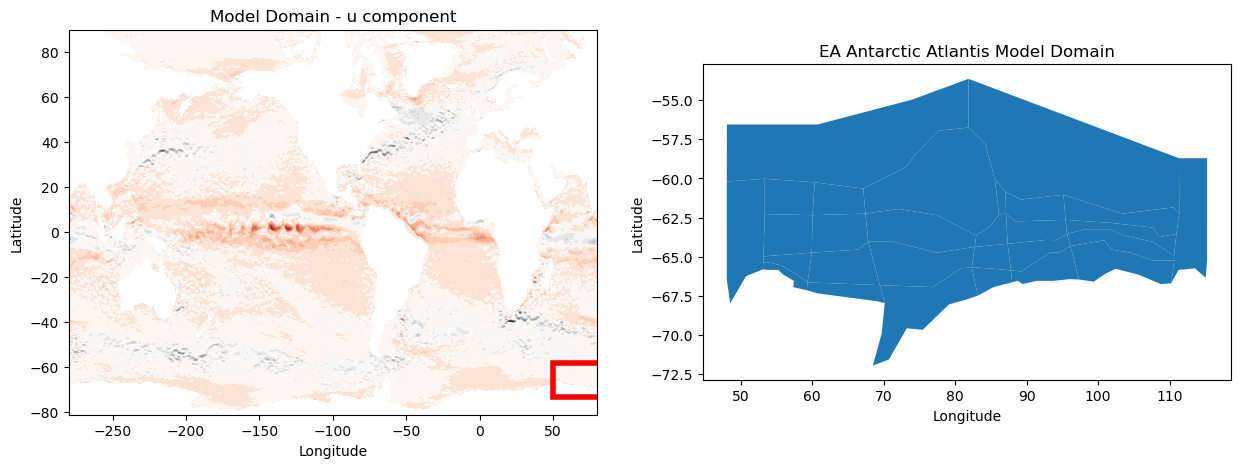

In [4]:
df = gpd.read_file('/home/por07g/Documents/Projects/Supervision/Ilaria/Polygons/Antarctica_28_lambert.shp')
# Define the new projection using the EPSG code
new_crs = 'EPSG:4326'
# Change the projection of the coordinates using to_crs
df = df.to_crs(new_crs)
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
# Plot the u component on the first subplot
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
ax1.contourf(lon_mesh, lat_mesh, u, 20, cmap='RdGy')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Model Domain - u component')

# Plot the shapefile on the second subplot
df.plot(ax=ax2)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('EA Antarctic Atlantis Model Domain')

# Draw a square on top of the second subplot
rect = Rectangle((50, -73), 60, 15, linewidth=4, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
# Show the plot
plt.show()


## Get the real domain of the model

48.05000000029992 -71.96990376236924 115.25294536115659 -53.63183346809707
<xarray.DataArray 'xu_ocean' ()>
array(80.) <xarray.DataArray 'xu_ocean' ()>
array(-279.9)
609


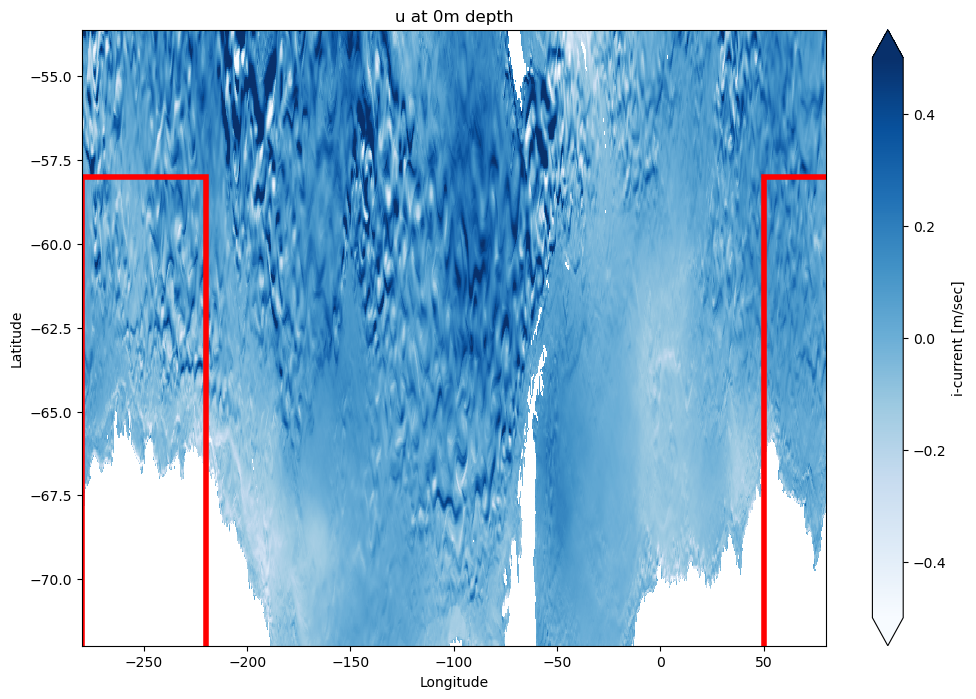

In [5]:
# change the longitude of the shapefile to be between 0 and 360
## get the bounds of the shapefile
min_lon, min_lat, max_lon, max_lat = df.total_bounds
print(min_lon, min_lat, max_lon, max_lat)
## boundaries of the hydrodynamic model
max_lon_model, min_lon_model = np.max(ds.xu_ocean), np.min(ds.xu_ocean)
print(max_lon_model, min_lon_model)
index=np.argmax(lat>-53.5)
print(index)
lat_range = slice(min_lat, max_lat)
lon_range = slice(min_lon, max_lon)
# # Select the subset of the data using sel
subset = ds.sel(yu_ocean=lat_range)
sub_u = subset['u'].isel(time=0, st_ocean=0)
sub_lat = subset['yu_ocean']
sub_lon = subset['xu_ocean']
# Plot the data using pcolormesh
fig, ax = plt.subplots(figsize=(12, 8))
sub_u.plot(ax=ax, cmap='Blues', vmin=-0.5, vmax=0.5)
ax.set_title('u at 0m depth')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Draw a square on top of the second subplot
rect = Rectangle((50, -73), 60, 15, linewidth=4, edgecolor='r', facecolor='none')
rect2 = Rectangle((-280, -73), 60, 15, linewidth=4, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect2)


In [6]:
## from the original netcdf file find the position of the lat and lon that match the lat and lon of the model
# Define the latitude and longitude ranges to select
# Get the maximum and minimum latitude and longitude values from the shapefile
min_lon, min_lat, max_lon, max_lat = df.total_bounds
#new_lon = np.where(lon < 0, lon - np.abs(np.min(ds.xu_ocean)) , lon)
print(min_lon, min_lat, max_lon, max_lat)
max_lon=max_lon-np.abs(lon_min)
min_lon=min_lon-np.abs(lon_min)
print(min_lon, min_lat, max_lon, max_lat)

lat_range = slice(min_lat, max_lat)
lon_range = slice(min_lon, max_lon)
# Select the subset of the data using sel
subset = ds.sel(yu_ocean=lat_range, xu_ocean=lon_range)
u = subset['u'].isel(time=0, st_ocean=0)
sub_lat = subset['yu_ocean']
sub_lon = subset['xu_ocean']
# Plot the data using pcolormesh
fig, ax = plt.subplots(figsize=(12, 8))
u.plot(ax=ax, cmap='Blues', vmin=-0.5, vmax=0.5)
ax.set_title('u at 0m depth')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

48.05000000029992 -71.96990376236924 115.25294536115659 -53.63183346809707


NameError: name 'lon_min' is not defined